<a href="https://colab.research.google.com/github/Greg9998/Demo111/blob/master/Lab6_MyWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data and analyse it via summary function, also make a copy of orginal (data0)

In [5]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

#Read data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/heart_disease.csv')
data0 = data.copy()

def summary(df):
    print('data shape: ',df.shape)
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['missing'] = df.isnull().sum().values
    summ['%miss'] = df.isnull().sum().values / len(df)
    summ['unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['Quant1'] = df.quantile(0.25)
    summ['median'] = df.quantile(0.5)
    summ['Quant3'] = df.quantile(0.75)
    summ['max'] = desc['max'].values
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    summ['kurt'] = df.kurt()
    return summ
summary(data)

data shape:  (4238, 16)


,data type,missing,%miss,unique,min,Quant1,median,Quant3,max,mean,std,kurt
Gender,object,0,0.000000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,int64,0,0.000000,39,32.0,42.00,49.0,56.000,70.0,49.584946,8.572160,-0.989636
education,object,105,0.024776,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currentSmoker,int64,0,0.000000,2,0.0,0.00,0.0,1.000,1.0,0.494101,0.500024,-2.000387
cigsPerDay,float64,29,0.006843,33,0.0,0.00,0.0,20.000,70.0,9.003089,11.920094,1.023356
BPMeds,float64,53,0.012506,2,0.0,0.00,0.0,0.000,1.0,0.029630,0.169584,28.816384
prevalentStroke,object,0,0.000000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevalentHyp,int64,0,0.000000,2,0.0,0.00,0.0,1.000,1.0,0.310524,0.462763,-1.329411
diabetes,int64,0,0.000000,2,0.0,0.00,0.0,0.000,1.0,0.025720,0.158316,33.948587
totChol,float64,50,0.011798,248,107.0,206.00,234.0,263.000,696.0,236.721585,44.590334,4.131582


Remove missing values

In [6]:
data.dropna(inplace=True)
data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


Replace categorical data using integers

In [7]:
from sklearn.preprocessing import OrdinalEncoder

#naturaly progression integers:
enc = OrdinalEncoder(categories=[['uneducated','primaryschool','graduate','postgraduate']])
enc.fit(data[['education']])
data[['education']] = enc.transform(data[['education']])

#binary vals
enc = OrdinalEncoder()
enc.fit(data[['Gender','prevalentStroke','Heart_ stroke']])
data[['Gender','prevalentStroke','Heart_ stroke']] = enc.transform(data[['Gender','prevalentStroke','Heart_ stroke']])
data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,1.0,39,3.0,0,0.0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46,1.0,0,0.0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48,0.0,1,20.0,0.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61,2.0,1,30.0,0.0,0.0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46,2.0,1,23.0,0.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


Exploratory data analysis

<Axes: >

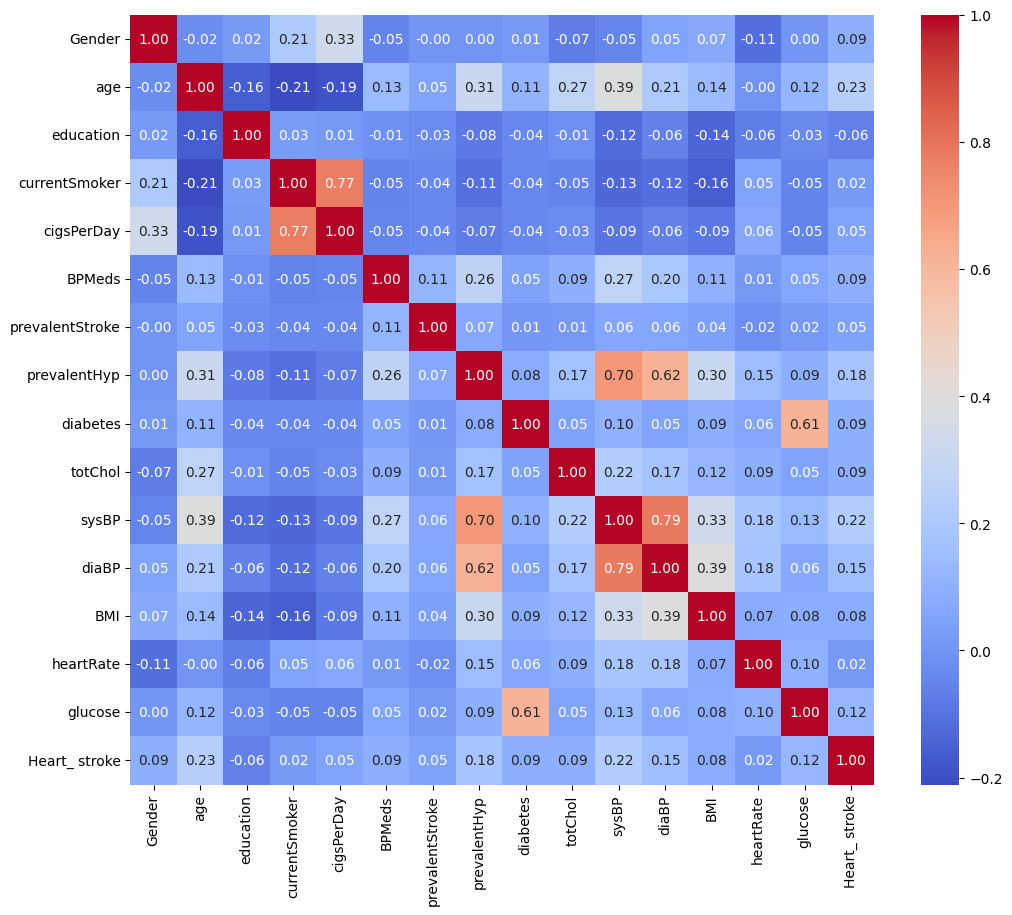

In [111]:
corr = data.corr()
plt.figure(figsize=(12,10),dpi=100)
sns.heatmap(corr,cmap="coolwarm",fmt=".2f",annot=True)

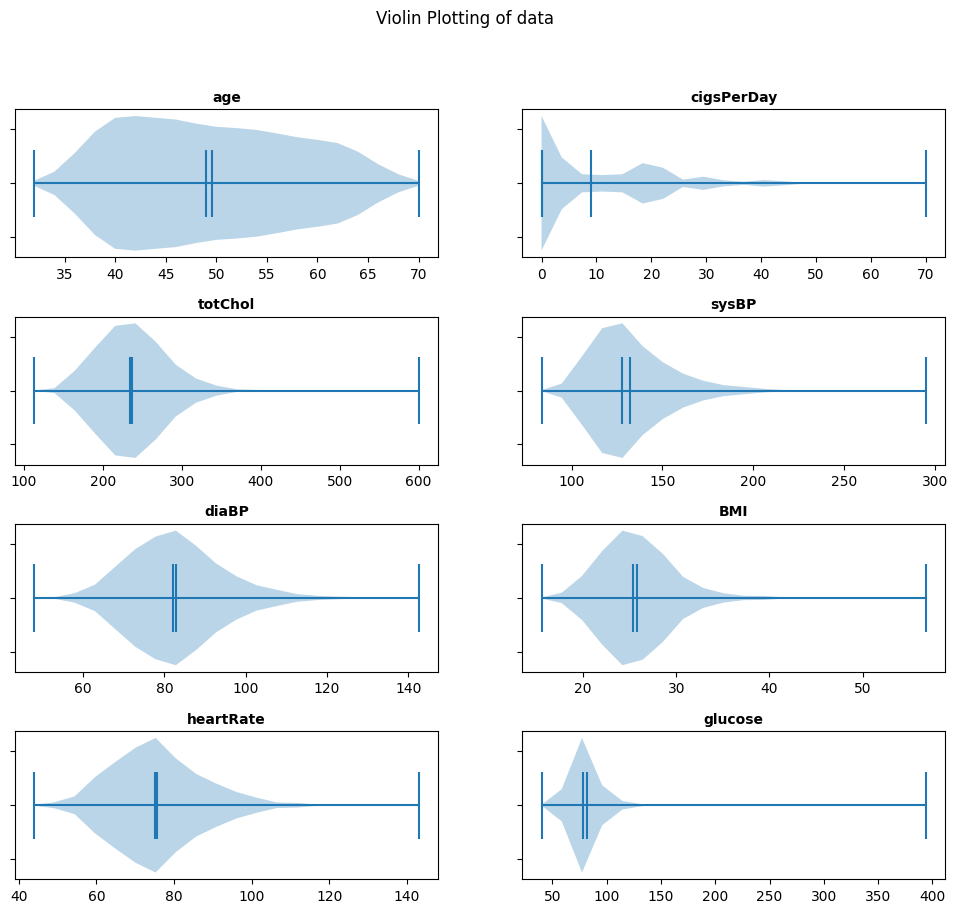

In [46]:
fs = 10  # fontsize

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))

axs[0, 0].violinplot(data['age'], vert=False, points=20, showmeans=True, showextrema=True, showmedians=True)
axs[0, 0].set_title('age', fontsize=fs,fontweight='bold')

axs[0, 1].violinplot(data['cigsPerDay'], vert=False, points=20, showmeans=True, showextrema=True, showmedians=True)
axs[0, 1].set_title('cigsPerDay', fontsize=fs,fontweight='bold')

axs[1, 0].violinplot(data['totChol'], vert=False, points=20, showmeans=True, showextrema=True, showmedians=True)
axs[1, 0].set_title('totChol', fontsize=fs,fontweight='bold')

axs[1, 1].violinplot(data['sysBP'], vert=False, points=20, showmeans=True, showextrema=True, showmedians=True)
axs[1, 1].set_title('sysBP', fontsize=fs,fontweight='bold')

axs[2, 0].violinplot(data['diaBP'], vert=False, points=20, showmeans=True, showextrema=True, showmedians=True)
axs[2, 0].set_title('diaBP', fontsize=fs,fontweight='bold')

axs[2, 1].violinplot(data['BMI'], vert=False, points=20, showmeans=True, showextrema=True, showmedians=True)
axs[2, 1].set_title('BMI', fontsize=fs,fontweight='bold')

axs[3, 0].violinplot(data['heartRate'], vert=False, points=20, showmeans=True, showextrema=True, showmedians=True)
axs[3, 0].set_title('heartRate', fontsize=fs,fontweight='bold')

axs[3, 1].violinplot(data['glucose'], vert=False, points=20, showmeans=True, showextrema=True, showmedians=True)
axs[3, 1].set_title('glucose', fontsize=fs,fontweight='bold')

for ax in axs.flat:
    ax.set_yticklabels([])

fig.suptitle('Violin Plotting of data')
fig.subplots_adjust(hspace=0.4)
plt.show()

<Axes: title={'center': 'heartRate'}, xlabel='currentSmoker'>

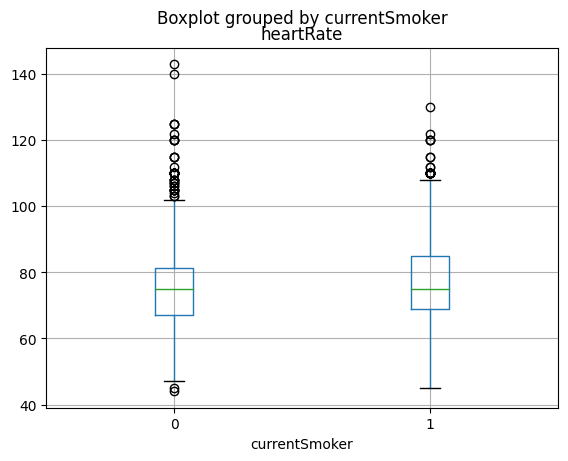

In [175]:
data0.boxplot('heartRate', by='currentSmoker')

<Axes: >

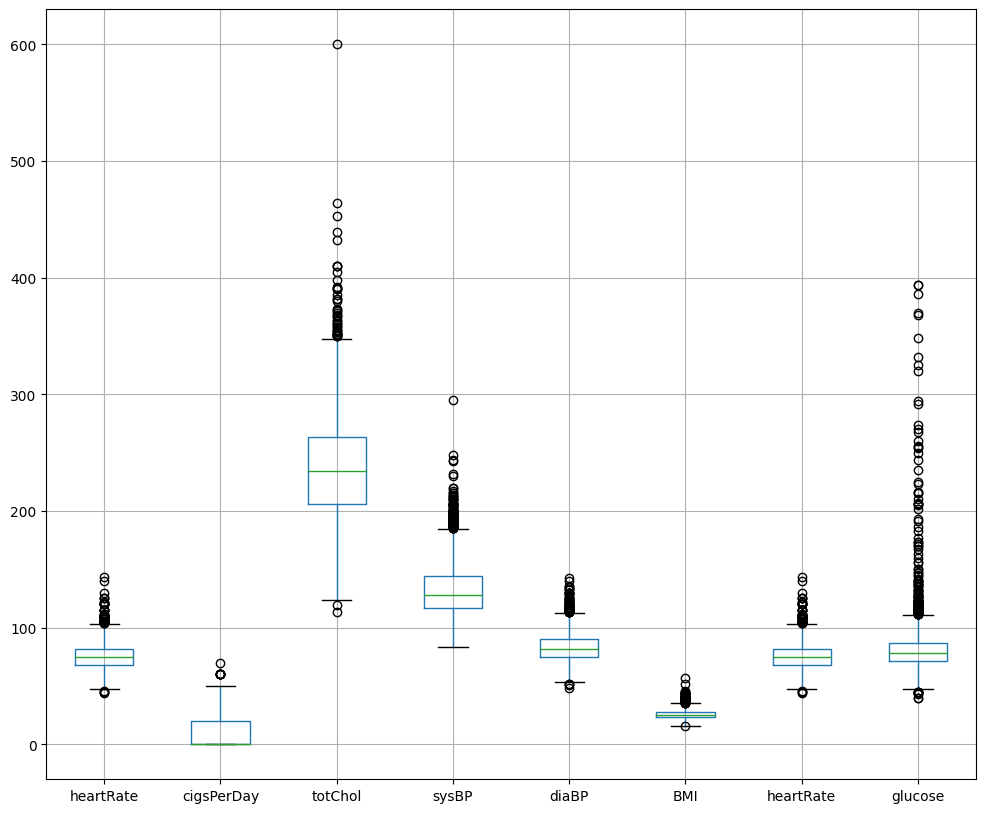

In [115]:
data.boxplot(['heartRate','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'],figsize=(12, 10))

Remove outliers with 0.5% Threshold

<Axes: >

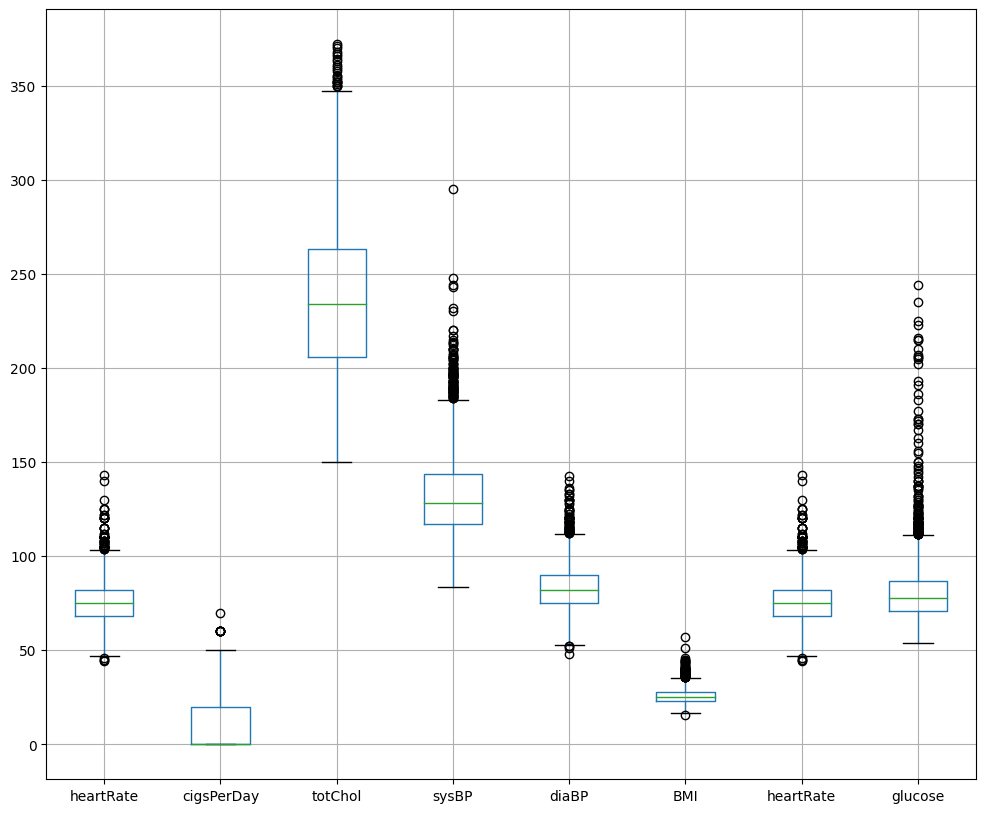

In [8]:
outliersThreshold = 0.005

q_low = data.quantile(outliersThreshold)
q_hi = data.quantile(1-outliersThreshold)
data2 = data[(data['totChol'] < q_hi['totChol']) & (data['glucose'] < q_hi['glucose'])
 & (data['totChol'] > q_low['totChol']) & (data['glucose'] > q_low['glucose'])]

data2.boxplot(['heartRate','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'],figsize=(12, 10))

In [9]:
summary(data2)

data shape:  (3578, 16)


,data type,missing,%miss,unique,min,Quant1,median,Quant3,max,mean,std,kurt
Gender,float64,0,0.0,2,0.00,0.00,0.000,1.000,1.0,0.443544,0.496872,-1.949391
age,int64,0,0.0,39,32.00,42.00,49.000,56.000,70.0,49.529905,8.554865,-0.984642
education,float64,0,0.0,4,0.00,0.00,1.000,2.000,3.0,0.986864,1.025586,-0.737335
currentSmoker,int64,0,0.0,2,0.00,0.00,0.000,1.000,1.0,0.487982,0.499925,-1.998803
cigsPerDay,float64,0,0.0,33,0.00,0.00,0.000,20.000,70.0,9.016769,11.927502,0.976695
BPMeds,float64,0,0.0,2,0.00,0.00,0.000,0.000,1.0,0.029905,0.170349,28.511583
prevalentStroke,float64,0,0.0,2,0.00,0.00,0.000,0.000,1.0,0.005869,0.076396,165.619884
prevalentHyp,int64,0,0.0,2,0.00,0.00,0.000,1.000,1.0,0.308832,0.462076,-1.315326
diabetes,int64,0,0.0,2,0.00,0.00,0.000,0.000,1.0,0.021800,0.146050,40.952963
totChol,float64,0,0.0,214,150.00,206.00,234.000,263.000,372.0,236.467300,41.599179,-0.138412


Split data2 into training and testing subsets 70:30

In [10]:
from sklearn.model_selection import train_test_split

X = data2.drop('heartRate', axis = 1)
y = data2['heartRate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=12)

Standardization and Min-Max scaling of the data2

In [11]:
from sklearn.preprocessing import (MinMaxScaler,StandardScaler)
from traitlets.traitlets import default

standard_scaler = StandardScaler().set_output(transform="pandas")
data_standardized = standard_scaler.fit_transform(data2)
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
data_normalized = minmax_scaler.fit_transform(data2)

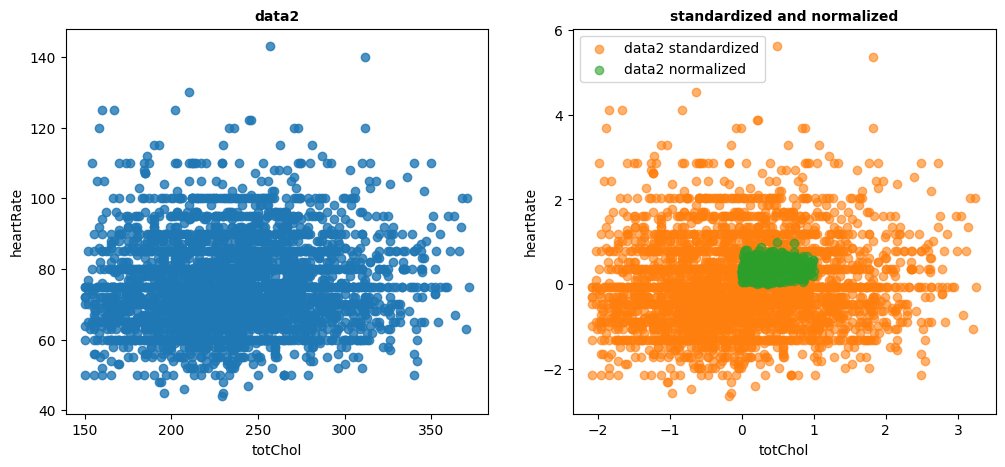

In [45]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5),dpi=100)

axs[0].scatter(data2['totChol'], data2['heartRate'],alpha=0.8)
axs[0].set_title('data2', fontsize=fs,fontweight='bold')
axs[0].set_xlabel('totChol', fontsize=fs)
axs[0].set_ylabel('heartRate', fontsize=fs)

axs[1].scatter(data_standardized['totChol'], data_standardized['heartRate'],c='#ff7f0e',alpha=0.6)
axs[1].scatter(data_normalized['totChol'], data_normalized['heartRate'],c='#2ca02c',alpha=0.6)
axs[1].set_title('standardized and normalized', fontsize=fs,fontweight='bold')
axs[1].set_xlabel('totChol', fontsize=fs)
axs[1].set_ylabel('heartRate', fontsize=fs)
plt.legend(['data2 standardized','data2 normalized'])

PCA

In [15]:
from sklearn.decomposition import PCA
#data2
pca = PCA().set_output(transform="pandas").fit(data2)
data_pca = pca.transform(data2)
#data_standardized
pca = PCA().set_output(transform="pandas").fit(data_standardized)
data_standardized_pca = pca.transform(data_standardized)
#data_normalized
pca = PCA().set_output(transform="pandas").fit(data_normalized)
data_normalized_pca = pca.transform(data_normalized)

data_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15
0,-46.437712,-20.666699,1.944805,-2.242267,12.981145,-4.831349,3.151161,3.049362,1.921815,0.713105,-0.042648,-0.070106,0.184134,0.027045,-0.005546,0.001296
1,11.698748,-11.394652,-0.650020,6.028486,22.132193,-2.978455,-1.493742,2.935385,0.067115,-0.223270,-0.088487,0.170039,0.205982,0.009822,-0.000416,-0.000582
2,6.864402,-9.571544,-10.247216,8.243752,-5.512620,1.687047,0.641999,0.341164,-1.011289,0.398155,-0.256307,0.162407,-0.196448,0.010565,0.024789,-0.000313
3,-6.741505,24.955666,15.760141,7.100121,-26.198372,6.502539,-8.955537,0.942708,1.264462,-0.883615,0.813856,-0.132614,0.188790,-0.128037,-0.124505,-0.014365
4,47.242887,-10.483185,4.433066,17.322828,-2.429135,-2.441580,0.394089,-2.826219,0.845723,-0.562394,-0.152862,0.227364,-0.002612,-0.008601,-0.028498,0.004327


Text(0, 0.5, 'pca13')

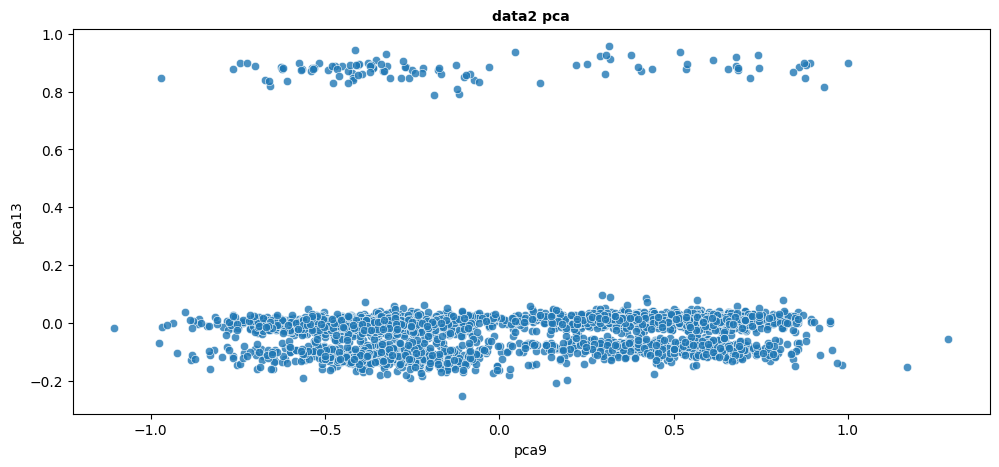

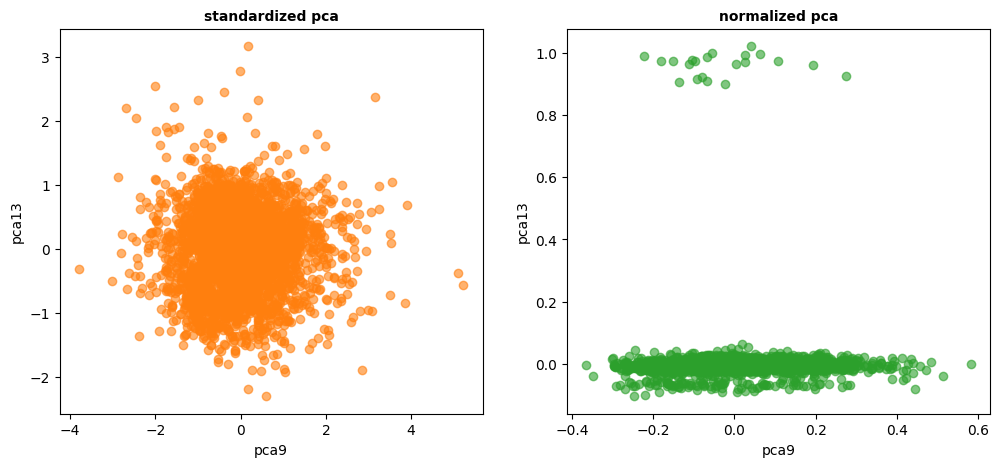

In [44]:
pca_1 = 'pca9'
pca_2 = 'pca13'


plt.figure(figsize=(11.83,5), dpi=100)
sns.scatterplot(data=data_pca, x='pca9', y='pca13',alpha=0.8)
plt.title('data2 pca', fontsize=fs,fontweight='bold')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5),dpi=100)

axs[0].scatter(data_standardized_pca[pca_1], data_standardized_pca[pca_2],c='#ff7f0e',alpha=0.6)
axs[0].set_title('standardized pca', fontsize=fs,fontweight='bold')
axs[0].set_xlabel(pca_1, fontsize=fs)
axs[0].set_ylabel(pca_2, fontsize=fs)

axs[1].scatter(data_normalized_pca[pca_1], data_normalized_pca[pca_2],c='#2ca02c',alpha=0.6)
axs[1].set_title('normalized pca', fontsize=fs,fontweight='bold')
axs[1].set_xlabel(pca_1, fontsize=fs)
axs[1].set_ylabel(pca_2, fontsize=fs)
